In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')


def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse


def calculate_mape(gt, output):
    mape = mean_absolute_percentage_error(gt, output)
    return mape

# Only Volatility

In [401]:
BZBZ_onlyvol = pd.read_csv('Files/BZBZ_onlyvol_re.csv', index_col=0)
SPBZ_onlyvol = pd.read_csv('Files/SPBZ_onlyvol_re2.csv', index_col=0)

BZBZ_onlyvol.index = pd.to_datetime(BZBZ_onlyvol.index)
SPBZ_onlyvol.index = pd.to_datetime(SPBZ_onlyvol.index)

pred_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Predictions'])
truth_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Ground Truths'])
pred_SPBZ_onlyvol = pd.DataFrame(SPBZ_onlyvol['Predictions'])
truth_SPBZ_onlyvol = pd.DataFrame(SPBZ_onlyvol['Ground Truths'])

# pred_inv2 = pd.DataFrame(SPBZ_onlyvol['Predictions'])
# truth_inv2 = pd.DataFrame(SPBZ_onlyvol['Ground Truths'])

loaded_scaler_onlyvol = load('Database/Scaler/scaler_0_onlyvol.joblib')

pred1 = loaded_scaler_onlyvol.inverse_transform(pred_BZBZ_onlyvol)
truth1 = loaded_scaler_onlyvol.inverse_transform(truth_BZBZ_onlyvol)
pred2 = loaded_scaler_onlyvol.inverse_transform(pred_SPBZ_onlyvol)
truth2 = loaded_scaler_onlyvol.inverse_transform(truth_SPBZ_onlyvol)

pred_inv = pd.DataFrame(pred1, columns=pred_BZBZ_onlyvol.columns, index=pred_BZBZ_onlyvol.index)
truth_inv = pd.DataFrame(truth1, columns=truth_BZBZ_onlyvol.columns, index=truth_BZBZ_onlyvol.index)
pred_inv2 = pd.DataFrame(pred2, columns=pred_SPBZ_onlyvol.columns, index=pred_SPBZ_onlyvol.index)
truth_inv2 = pd.DataFrame(truth2, columns=truth_SPBZ_onlyvol.columns, index=truth_SPBZ_onlyvol.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# Exterior

In [402]:
# BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500.csv', index_col=0)
# SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500.csv', index_col=0)
BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500_re.csv', index_col=0)
SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500_re.csv', index_col=0)
SP500 = pd.read_csv('Database/BZ_vol_SP500.csv', index_col=0)

BZBZ_SP500.index = pd.to_datetime(BZBZ_SP500.index)
SPBZ_SP500.index = pd.to_datetime(SPBZ_SP500.index)
SP500.index = pd.to_datetime(SP500.index)

pred_BZBZ_SP500 = pd.concat([BZBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_BZBZ_SP500 = pd.concat([BZBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()
pred_SPBZ_SP500 = pd.concat([SPBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_SPBZ_SP500 = pd.concat([SPBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()

loaded_scaler_SP500 = load('Database/Scaler/scaler_0_SP500.joblib')

pred3 = loaded_scaler_SP500.inverse_transform(pred_BZBZ_SP500)
truth3 = loaded_scaler_SP500.inverse_transform(truth_BZBZ_SP500)
pred4 = loaded_scaler_SP500.inverse_transform(pred_SPBZ_SP500)
truth4 = loaded_scaler_SP500.inverse_transform(truth_SPBZ_SP500)

pred_inv3 = pd.DataFrame(pred3, columns=pred_BZBZ_SP500.columns, index=pred_BZBZ_SP500.index)
truth_inv3 = pd.DataFrame(truth3, columns=truth_BZBZ_SP500.columns, index=truth_BZBZ_SP500.index)
pred_inv4 = pd.DataFrame(pred4, columns=pred_SPBZ_SP500.columns, index=pred_SPBZ_SP500.index)
truth_inv4 = pd.DataFrame(truth4, columns=truth_SPBZ_SP500.columns, index=truth_SPBZ_SP500.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


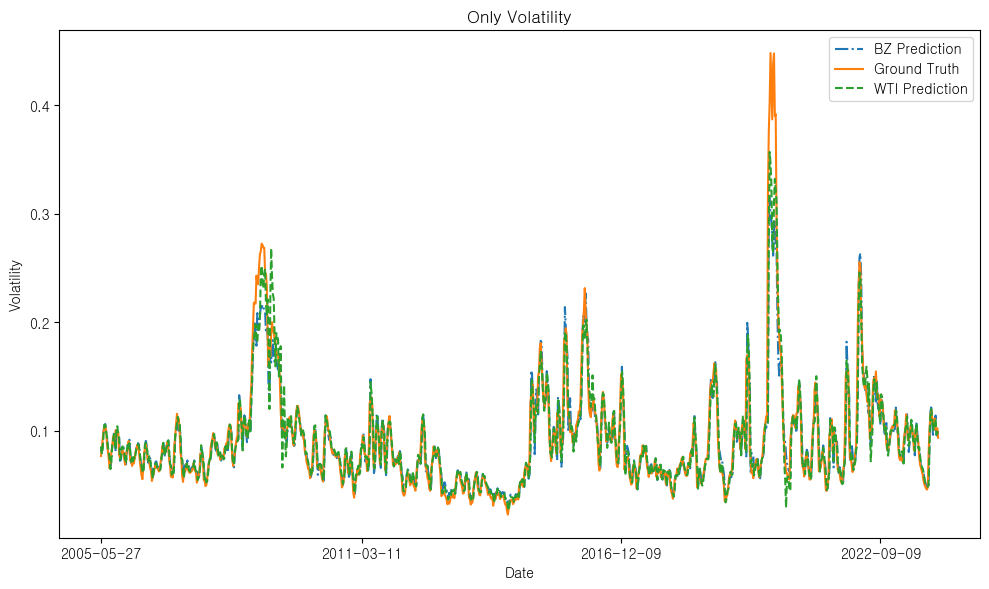

In [418]:
plt.figure(figsize=(10, 6))

start = 0
end = -1
plt.plot(pred_inv.iloc[start:end, 0], label='BZ Prediction', linestyle='-.')
plt.plot(truth_inv.iloc[start:end, 0], label='Ground Truth')
plt.plot(pred_inv2.iloc[start:end, 0], label='WTI Prediction', linestyle='--')

plt.title('Only Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[start:end:300])
plt.tight_layout()
plt.show()

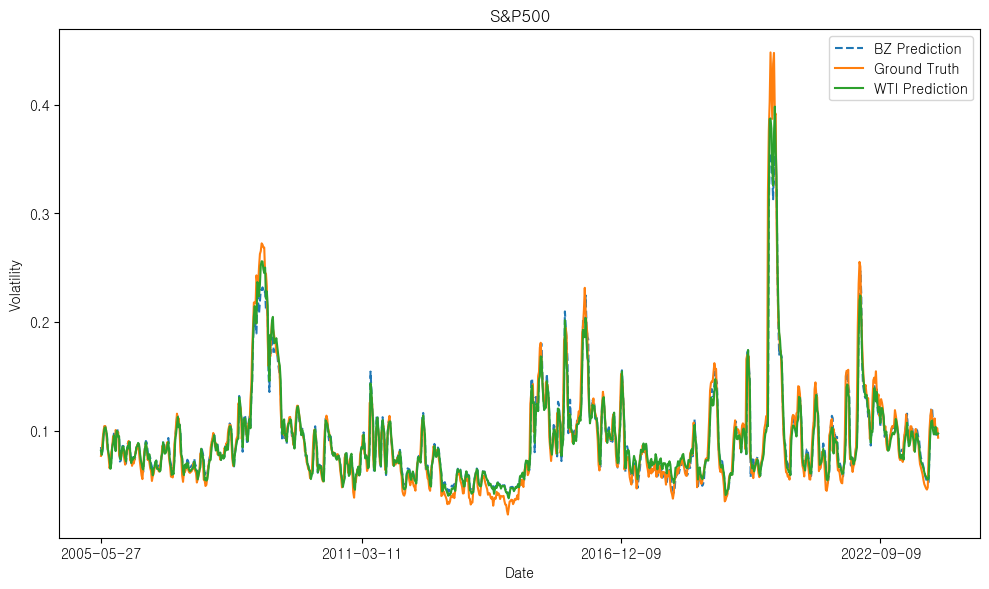

In [413]:
plt.figure(figsize=(10, 6))

start = 0
end = -1
plt.plot(pred_inv3.iloc[start:end, 0], label='BZ Prediction', linestyle='--')
plt.plot(truth_inv4.iloc[start:end, 0], label='Ground Truth')
plt.plot(pred_inv4.iloc[start:end, 0], label='WTI Prediction')

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv4.index[start:end:300])
plt.tight_layout()
plt.show()

# 전체기간

In [308]:
print('BZBZ_onlyvol_Total')
print(calculate_mae(truth_inv.values, pred_inv.values))
print(calculate_rmse(truth_inv.values, pred_inv.values))
print(calculate_mape(truth_inv.values, pred_inv.values))
print(f'{r2_score(truth_inv.values, pred_inv.values):.4f}')

BZBZ_onlyvol_Total
0.00956092761791849
0.01893068269375258
0.09630901133652953
0.8690


In [309]:
print('SPBZ_onlyvol_Total')
print(calculate_mae(truth_inv2.values, pred_inv2.values))
print(calculate_rmse(truth_inv2.values, pred_inv2.values))
print(calculate_mape(truth_inv2.values, pred_inv2.values))
print(f'{r2_score(truth_inv2.values, pred_inv2.values):.4f}')

SPBZ_onlyvol_Total
0.009102658858509303
0.017548086924170217
0.09168603636820058
0.8875


In [310]:
print('BZBZ_SP500_Total')
print(calculate_mae(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(calculate_rmse(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(calculate_mape(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(f'{r2_score(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values):.4f}')

BZBZ_SP500_Total
0.009363348378013232
0.016009587013284473
0.10855055963764944
0.9063


In [311]:
print('SPBZ_SP500_Total')
print(calculate_mae(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(calculate_rmse(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(calculate_mape(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(f'{r2_score(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values):.4f}')

SPBZ_SP500_Total
0.00902794406747913
0.015026565660573123
0.10608404358574126
0.9175


# 평상시 기간

In [312]:
print('BZBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_mape(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_onlyvol_변동성 작은 부분
0.005105440096106369
0.00680960886050675
0.06575672468659607


In [313]:
print('SPBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv2.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv2.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_mape(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv2.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_onlyvol_변동성 작은 부분
0.004882543152977805
0.006520040926772011
0.06295054545203545


In [314]:
print('BZBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv3.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv3.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_mape(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv3.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_SP500_변동성 작은 부분
0.005506228036885495
0.007094637069307322
0.07300840243460502


In [315]:
print('SPBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                    pred_inv4.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv4.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_mape(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                     pred_inv4.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_SP500_변동성 작은 부분
0.005123663284088549
0.006879350732551993
0.06586464622732262


# 금융위기기간

In [316]:
start_period = '2008-06-01'
end_period = '2009-09-01'

In [317]:
print('BZBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv.loc[start_period:end_period, 'Predictions'].values))
print(calculate_mape(truth_inv.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv.loc[start_period:end_period, 'Predictions'].values))

BZBZ_onlyvol_변동성 큰 부분
0.01977807166250048
0.02707458782521372
0.10679623765938993


In [318]:
print('SPBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv2.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv2.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv2.loc[start_period:end_period, 'Predictions'].values))
print(calculate_mape(truth_inv2.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv2.loc[start_period:end_period, 'Predictions'].values))

SPBZ_onlyvol_변동성 큰 부분
0.022444617729969467
0.02925168274205439
0.13467711100397978


In [319]:
print('BZBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv3.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv3.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv3.loc[start_period:end_period, 'Predictions'].values))
print(calculate_mape(truth_inv3.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv3.loc[start_period:end_period, 'Predictions'].values))

BZBZ_SP500_변동성 큰 부분
0.015545708607746053
0.020560892290071645
0.08887777888355539


In [320]:
print('SPBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv4.loc[start_period:end_period, 'Ground Truths'].values,
                    pred_inv4.loc[start_period:end_period, 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv4.loc[start_period:end_period, 'Predictions'].values))
print(calculate_mape(truth_inv4.loc[start_period:end_period, 'Ground Truths'].values,
                     pred_inv4.loc[start_period:end_period, 'Predictions'].values))

SPBZ_SP500_변동성 큰 부분
0.010985898565865498
0.014932566216030152
0.07009733941952084


# Summary of Volatility Statistics

In [321]:
BZ_vol = pd.read_csv('Database/BZ_vol_only_scaledX.csv', index_col=0)
SP_vol = pd.read_csv('Database/SP_vol_only_scaledX.csv', index_col=0)

In [322]:
BZ_Statistic_df = pd.concat([BZ_vol.describe(), BZ_vol.kurtosis(), BZ_vol.skew()], axis=0)
BZ_Statistic_df

,return,0
count,1266.000000,NaN
mean,0.093722,NaN
std,0.048048,NaN
min,0.022641,NaN
25%,0.065228,NaN
50%,0.083324,NaN
75%,0.106767,NaN
max,0.448219,NaN
return,NaN,14.360316
return,NaN,2.939221


In [323]:
SP_Statistic_df = pd.concat([SP_vol.describe(), SP_vol.kurtosis(), SP_vol.skew()], axis=0)
SP_Statistic_df

,return,0
count,1995.000000,NaN
mean,0.101009,NaN
std,0.058374,NaN
min,0.030718,NaN
25%,0.068307,NaN
50%,0.087747,NaN
75%,0.116946,NaN
max,0.732539,NaN
return,NaN,27.526132
return,NaN,3.855858


In [324]:
from scipy.stats import jarque_bera


def jarque_bera_test(data):
    # Perform Jarque-Bera test
    jb_stat, jb_p_value = jarque_bera(data)
    return jb_stat, jb_p_value

In [325]:
from statsmodels.tsa.stattools import adfuller


def adf_test(data):
    # Perform Augmented Dickey-Fuller test
    adf_stat, adf_p_value, _, _, _, _ = adfuller(data)
    return adf_stat, adf_p_value

In [326]:
print(jarque_bera_test(SP_vol.values))
print(adf_test(SP_vol.values))

print(jarque_bera_test(BZ_vol.values))
print(adf_test(BZ_vol.values))

(67590.05848960979, 0.0)
(-6.7201861339959486, 3.4990599078329017e-09)
(12603.74398139212, 0.0)
(-4.556695574231602, 0.00015511034474674894)


# NLP

In [393]:
_nlp = pd.read_csv('Files/NLP/Embedding.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_384.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_Embedding.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [390]:
_nlp = pd.read_csv('Files/NLP/Sentiment.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_sentiment.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_1_Sentiment.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [395]:
_nlp = pd.read_csv('Files/NLP/UMAP75.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_UMAP75.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_UMAP75.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [386]:
_nlp = pd.read_csv('Files/NLP/IE.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_IE.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_IE.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [397]:
_nlp = pd.read_csv('Files/NLP/UMAP100.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_UMAP100.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_UMAP100.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [380]:
vol = pd.read_csv('Files/NLP/additionalX_SP.csv', index_col=0)
vol.index = pd.to_datetime(vol.index)
vol=vol['Predictions']

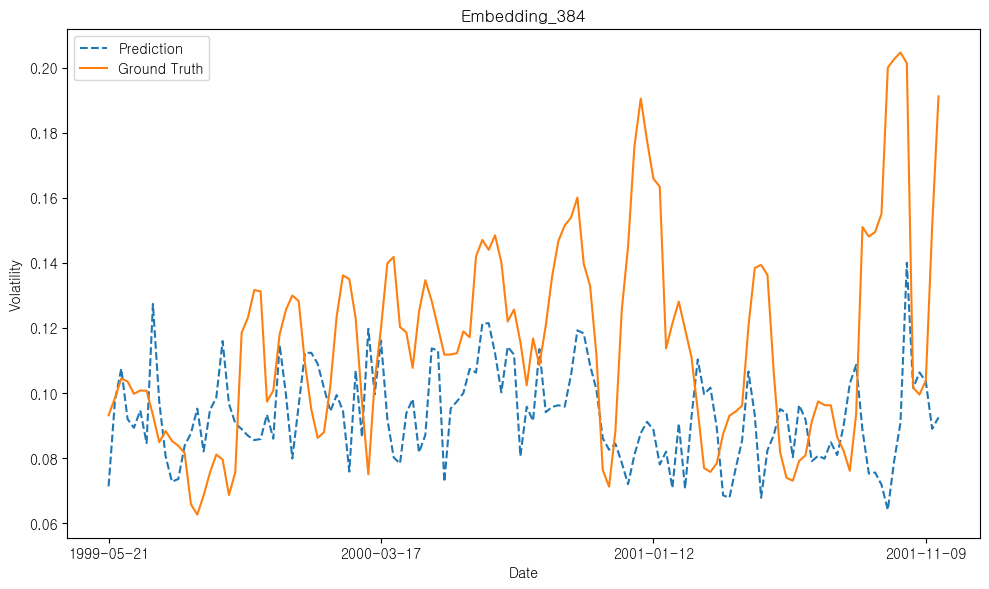

In [394]:
plt.figure(figsize=(10, 6))

start = 0
end = -1
plt.plot(pred_inv.iloc[start:end, 0], label='Prediction', linestyle='--')
# plt.plot(vol, label='Ground Truth', color='gray')
plt.plot(truth_inv.iloc[start:end, 0], label='Ground Truth')

plt.title('Embedding_384')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[start:end:43])
plt.tight_layout()
plt.show()

In [398]:
print('NEWS_Total')
print(calculate_mae(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(calculate_rmse(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(calculate_mape(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(f'{r2_score(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values):.4f}')

NEWS_Total
0.021333186366488333
0.027708806157870053
0.18664718372676153
0.2563


In [357]:
print('VOL_Total')
print(calculate_mae(truth_inv.iloc[:, 0].values, vol.values))
print(calculate_rmse(truth_inv.iloc[:, 0].values, vol.values))
print(calculate_mape(truth_inv.iloc[:, 0].values, vol.values))
print(f'{r2_score(truth_inv.iloc[:, 0].values, vol.values):.4f}')

VOL_Total
0.012153971878666056
0.016880721580178653
0.11149821354795195
0.7240
